In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# Set up paths
PROCESSED_DATA_PATH = '/workspace/COMP-3608---PROJECT/data/processed'
VIS_PATH = '/workspace/COMP-3608---PROJECT/notebooks/reports'
os.makedirs(VIS_PATH, exist_ok=True)



In [3]:
# Set plotting style
plt.style.use('ggplot')
sns.set_palette('husl')


In [4]:
def load_processed_data(filename):
    """Load processed dataset"""
    filepath = os.path.join(PROCESSED_DATA_PATH, filename)
    return pd.read_csv(filepath)



In [5]:
def plot_target_distribution(df, name):
    """Plot target variable distribution"""
    target_col = None
    
    # Find the target column based on dataset
    if 'diabetes' in df.columns:
        target_col = 'diabetes'
    elif 'stroke' in df.columns:
        target_col = 'stroke'
    elif 'num' in df.columns:
        target_col = 'num'
    
    if target_col:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=target_col, data=df)
        plt.title(f'Target Variable Distribution - {name}')
        plt.savefig(os.path.join(VIS_PATH, f'{name.lower().replace(" ", "_")}_target_dist.png'))
        plt.show()
        plt.close()


In [6]:
def plot_numerical_distributions(df, name):
    """Plot distributions of numerical features"""
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(num_cols) > 0:
        # Plot histograms for all numerical features
        df[num_cols].hist(bins=20, figsize=(15, 10))
        plt.suptitle(f'Numerical Features Distribution - {name}')
        plt.tight_layout()
        plt.savefig(os.path.join(VIS_PATH, f'{name.lower().replace(" ", "_")}_num_dist.png'))
        plt.show()
        plt.close()


In [7]:
def plot_correlation_matrix(df, name):
    """Plot correlation matrix for numerical features"""
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(num_cols) > 1:
        plt.figure(figsize=(12, 10))
        sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
        plt.title(f'Correlation Matrix - {name}')
        plt.tight_layout()
        plt.savefig(os.path.join(VIS_PATH, f'{name.lower().replace(" ", "_")}_corr_matrix.png'))
        plt.show()
        plt.close()


In [8]:
def visualize_dataset(df, name):
    """Generate all visualizations for a dataset"""
    plot_target_distribution(df, name)
    plot_numerical_distributions(df, name)
    plot_correlation_matrix(df, name)


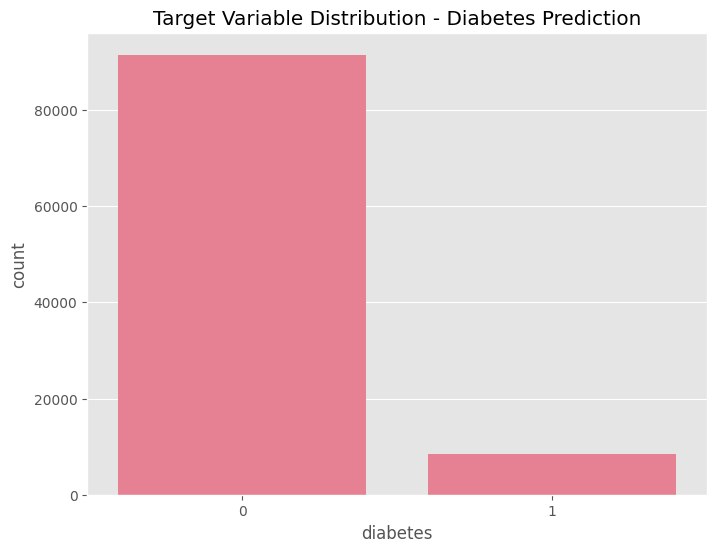

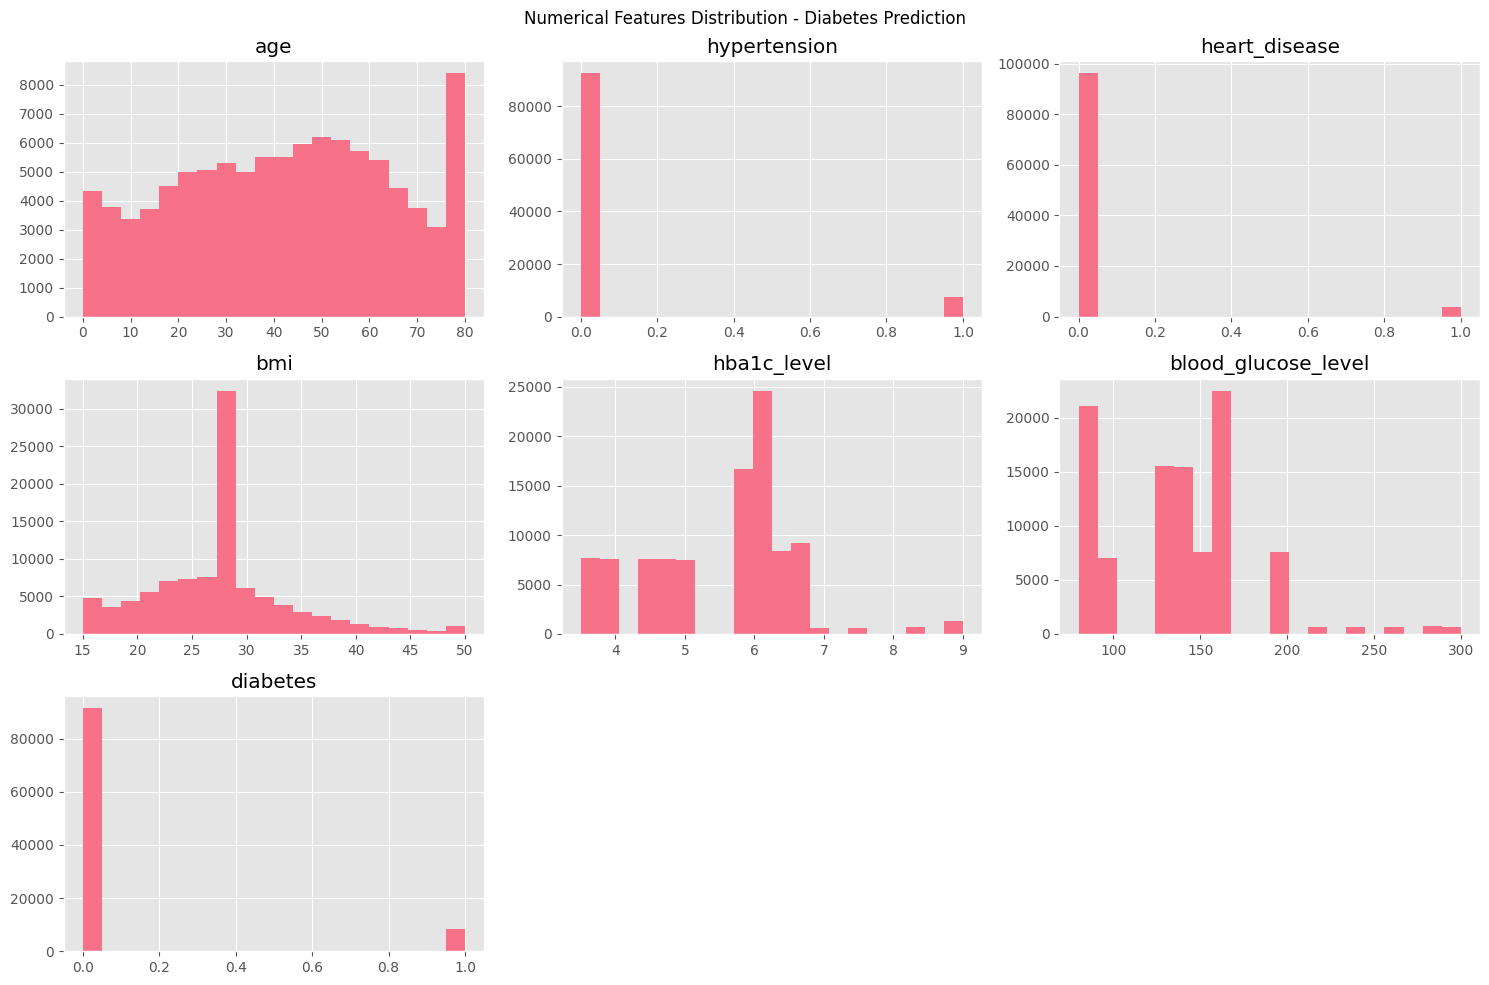

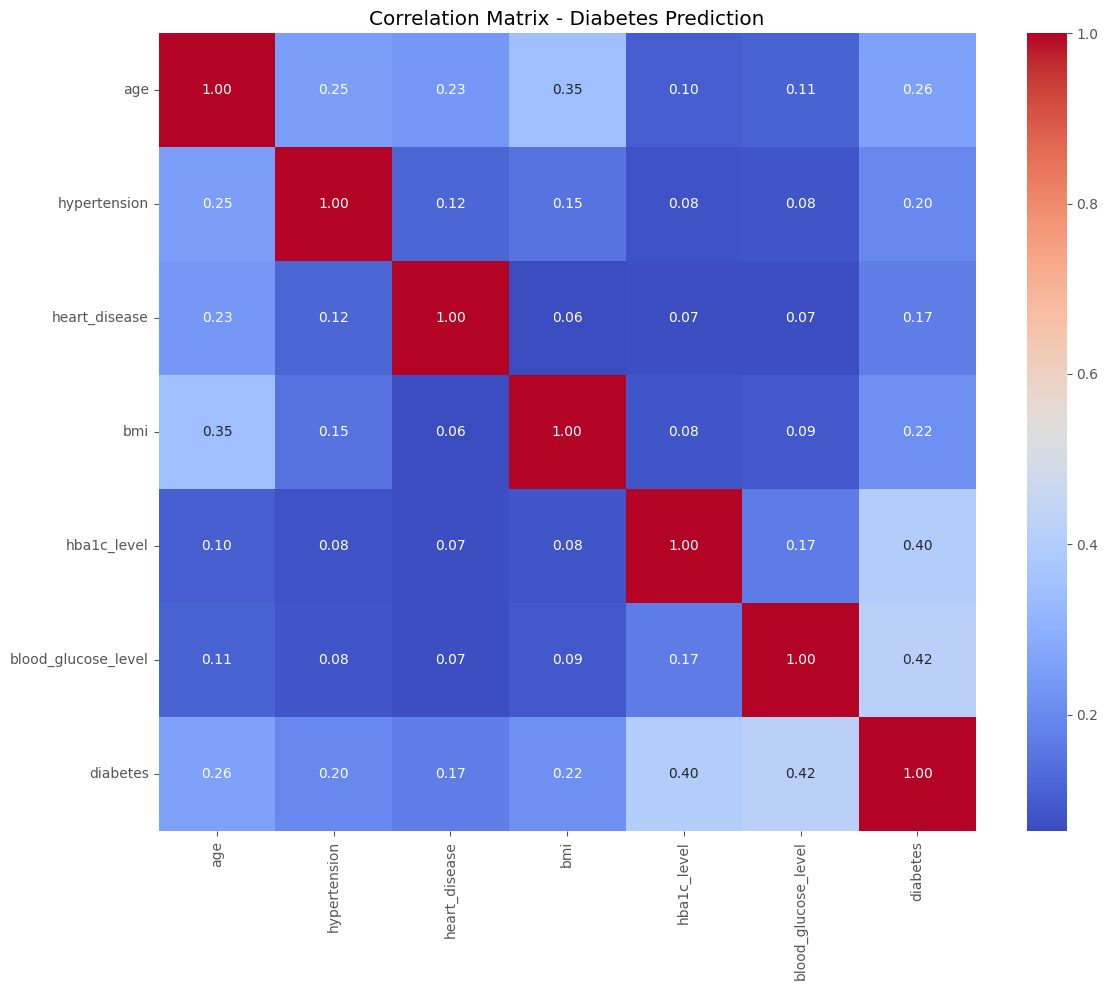

In [9]:
# Load and visualize Diabetes Dataset
diabetes_df = load_processed_data('processed_diabetes.csv')
visualize_dataset(diabetes_df, 'Diabetes Prediction')


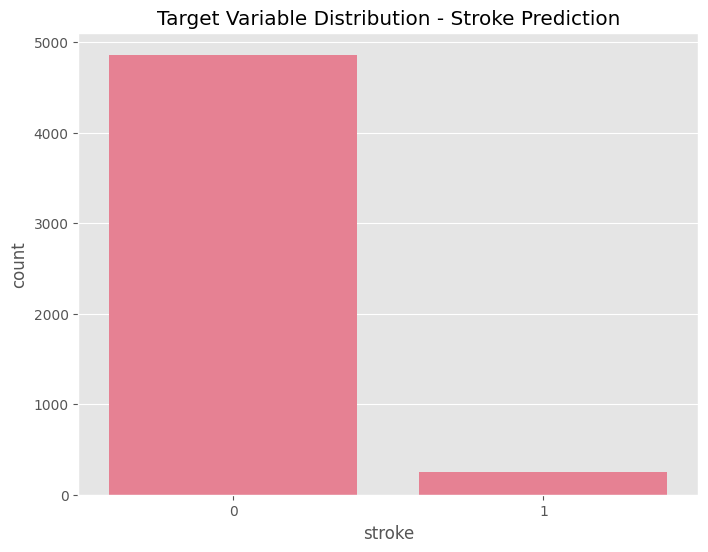

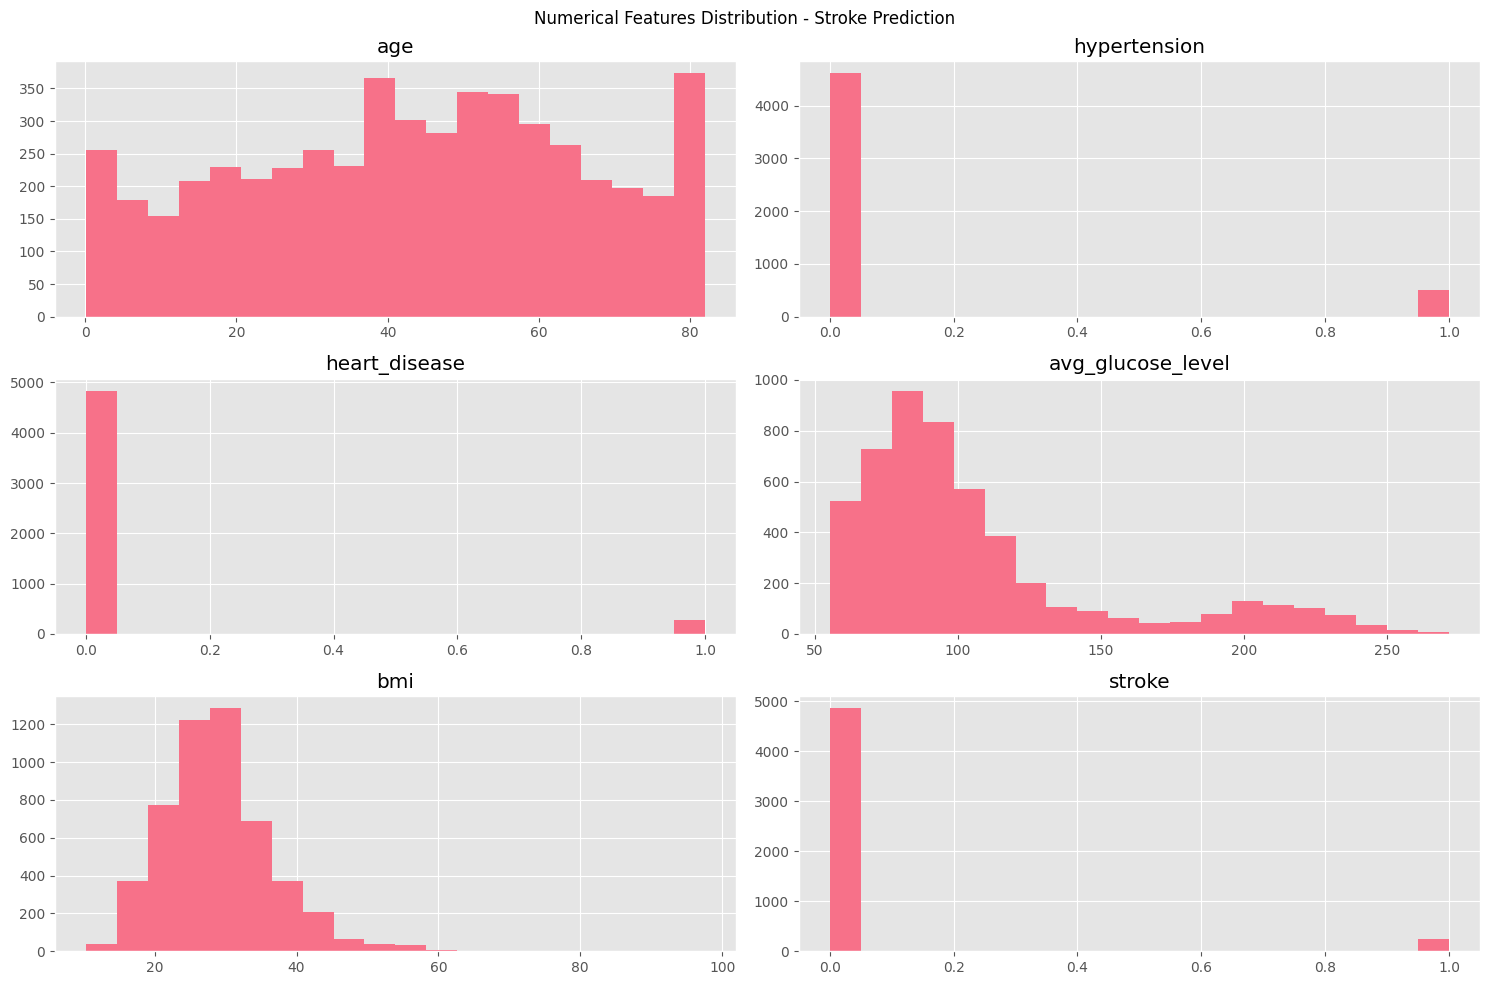

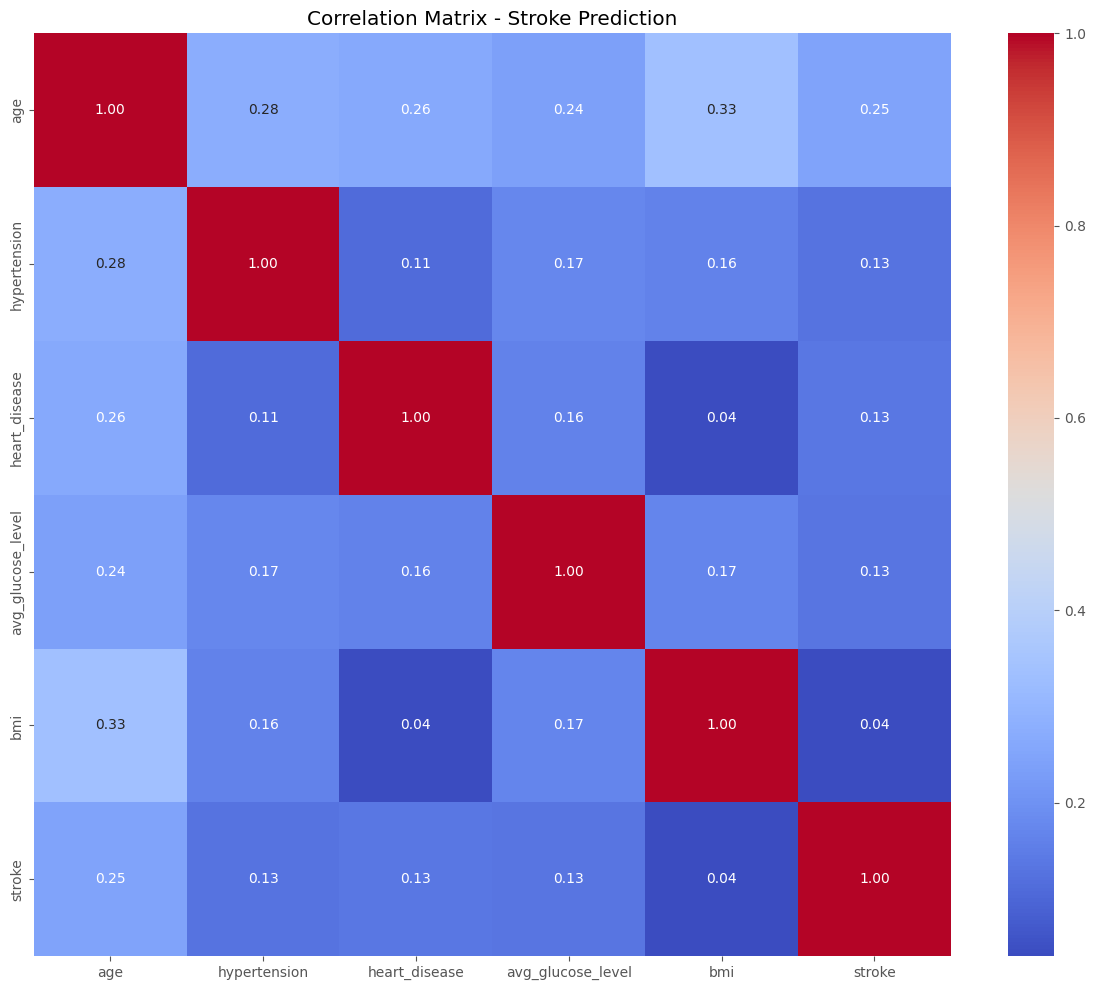

In [10]:
# Load and visualize Stroke Dataset
stroke_df = load_processed_data('processed_stroke.csv')
visualize_dataset(stroke_df, 'Stroke Prediction')


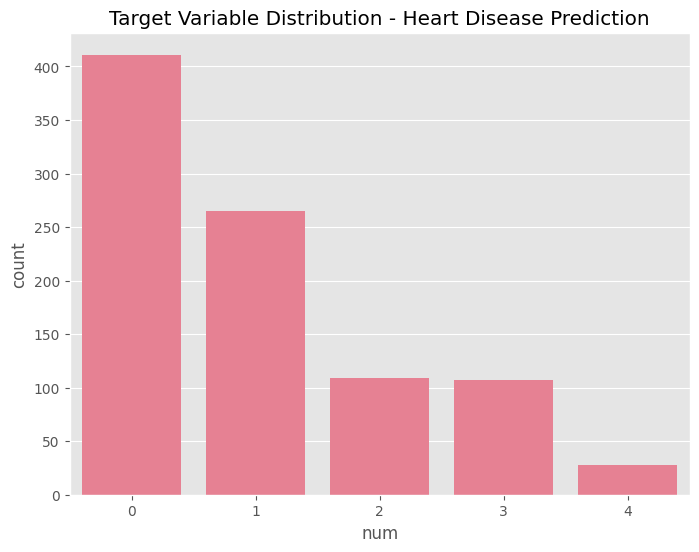

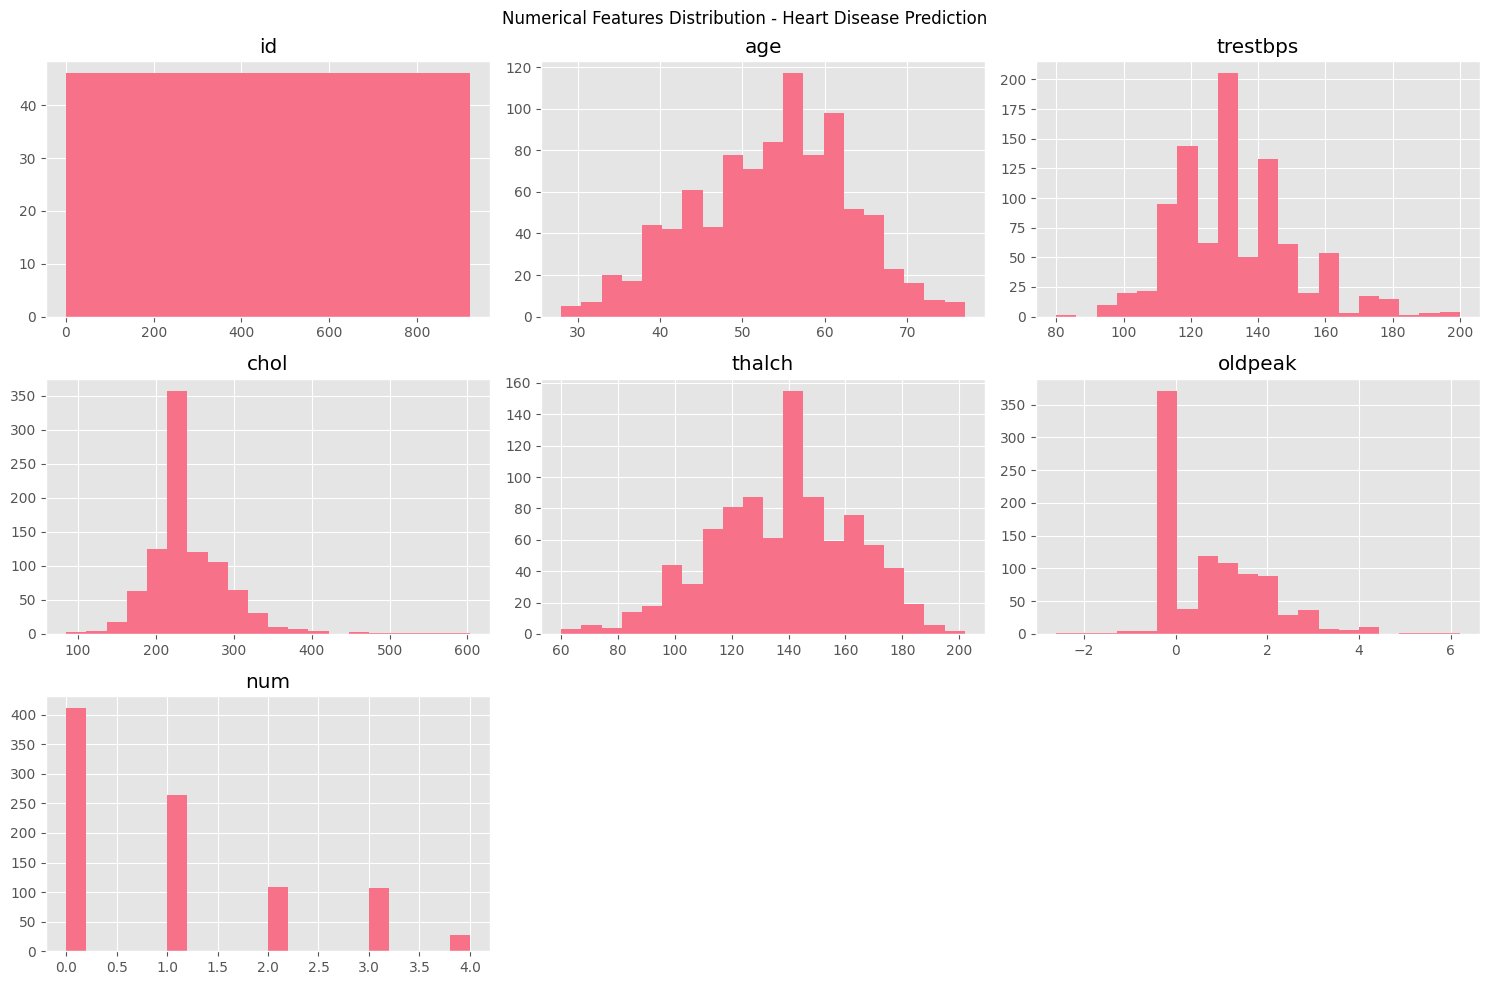

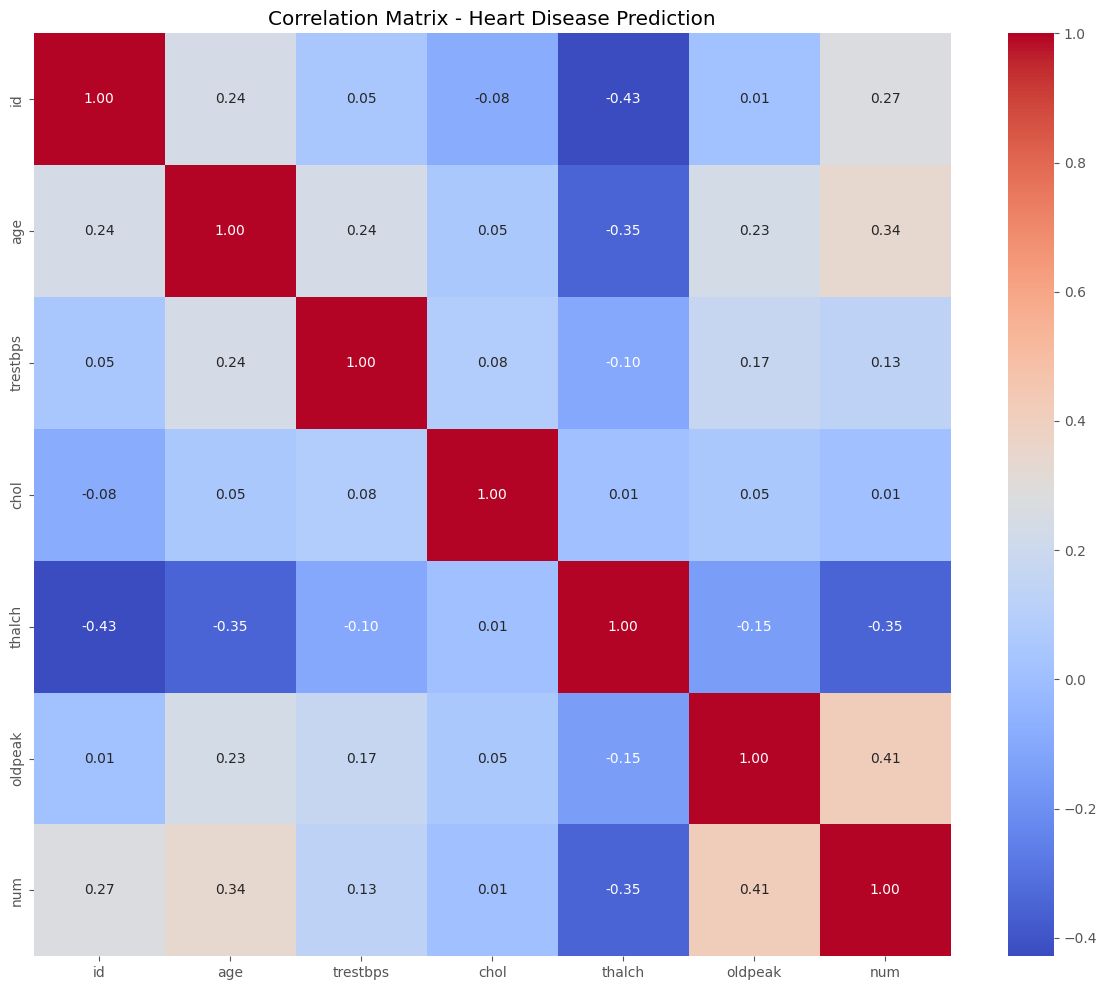

In [11]:
# Load and visualize Heart Disease Dataset
heart_df = load_processed_data('processed_heart_disease.csv')
visualize_dataset(heart_df, 'Heart Disease Prediction')


In [12]:
print("All visualizations generated and saved to reports/figures/")

All visualizations generated and saved to reports/figures/
